                     mean                                              \
E_lat          (-90, -80] (-80, -70] (-70, -60] (-60, -50] (-50, -40]   
D_alt                                                                   
(12000, 13000]        NaN        NaN        NaN        NaN        NaN   
(11000, 12000]        NaN        NaN        NaN        NaN        NaN   
(10000, 11000]        NaN        NaN        NaN        NaN        NaN   
(9000, 10000]         NaN        NaN        NaN        NaN        NaN   
(8000, 9000]          NaN        NaN        NaN        NaN        NaN   
(7000, 8000]          NaN        NaN        NaN        NaN        NaN   
(6000, 7000]          NaN        NaN        NaN        NaN        NaN   
(5000, 6000]          NaN        NaN        NaN        NaN        NaN   
(4000, 5000]          NaN        NaN        NaN        NaN        NaN   
(3000, 4000]          NaN        NaN        NaN        NaN        NaN   
(2000, 3000]    -0.007075        NaN        NaN    

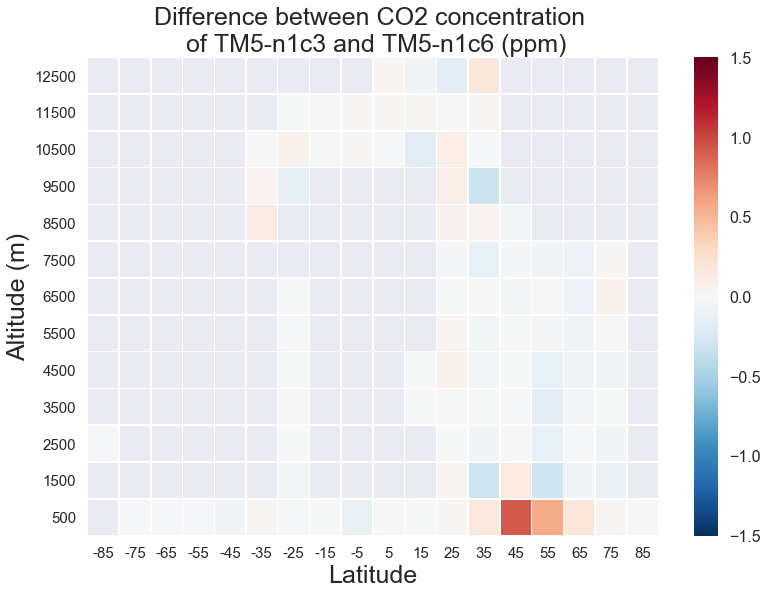

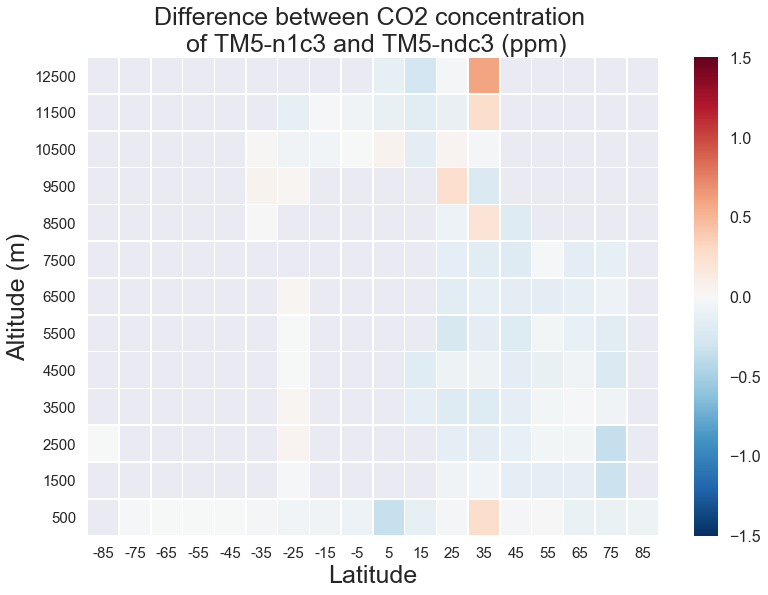

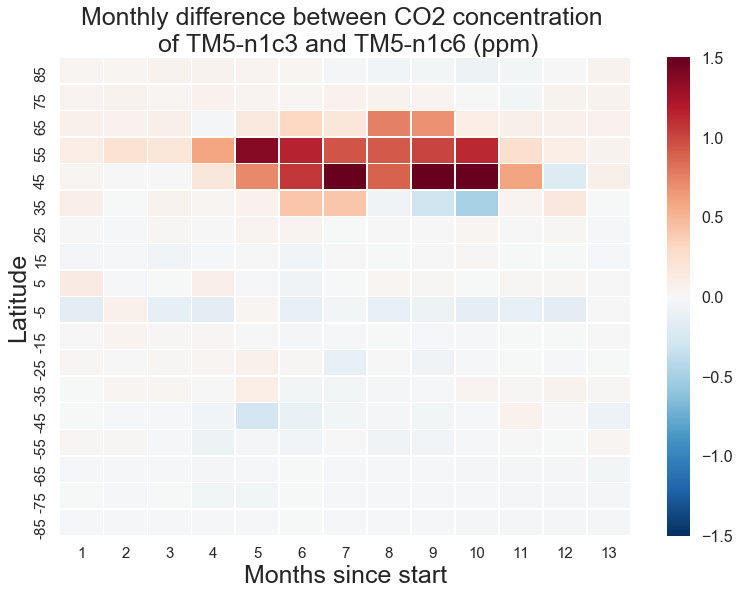

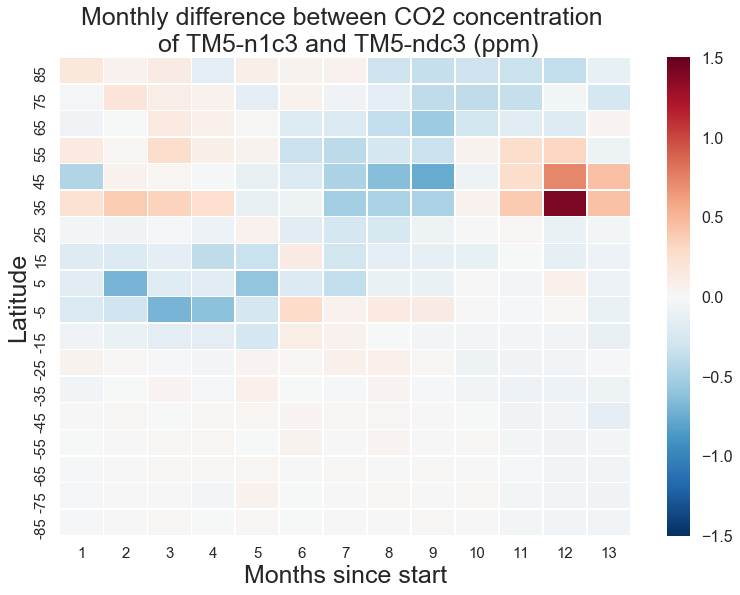

In [15]:
#1. TIME SERIES PLOT FOR SELECTED STATIONS FOR DIFFERENT RELAXATION TIMES.
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime
plt.style.use('seaborn-poster')

knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/benchmarkrun_2014/'
path = macbookpath


fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fn1c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_n1c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)        
temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'U_fn1c6_obs': fn1c6_obs*1000000,
                   'V_fn6c6_obs': fn6c6_obs*1000000,
                   'W_fndc6_obs': fndc6_obs*1000000,
                   'X_fn6c3_obs': fn6c3_obs*1000000,
                   'Y_fndc3_obs': fndc3_obs*1000000},index=obs_num)

df = df[(df.A_fin_obs<500) & (df.A_fin_obs>350)]
df['month'] = pd.DatetimeIndex(df['G_date']).month
df['year'] = pd.DatetimeIndex(df['G_date']).year
df['cum_month'] = df['month']-11+(12*(df['year']-2013))
#print(df['I_obs_loc'=='ces'])


#Difference between TM5-Offline and TM5-n1c3, positive means TM5-Offline is larger.
df['H_diff_n1c3_n1c6'] = df['C_fn1c3_obs']-df['U_fn1c6_obs']
df['I_diff_n1c3_ndc3'] = df['C_fn1c3_obs']-df['Y_fndc3_obs']
GLOB= (df.E_lat>-200) & (df.E_lat<200) & (df.F_lon>-200) & (df.F_lon<200) #Global mask to view all the data
mask=GLOB

# Calculate the mean of all the values that fit in the numpy array boxes and use the unstack function to get rid of the multi-index dataframe
lat_diff_n1c3_n1c6 = df[mask]['H_diff_n1c3_n1c6'].groupby([pd.cut(df[mask]['D_alt'],np.arange(0,14000,1000)),
                                                    pd.cut(df[mask]['E_lat'],np.arange(-90,100,10))]).agg({'mean':np.mean}).unstack()
lat_diff_n1c3_ndc3 = df[mask]['I_diff_n1c3_ndc3'].groupby([pd.cut(df[mask]['D_alt'],np.arange(0,14000,1000)),
                                                    pd.cut(df[mask]['E_lat'],np.arange(-90,100,10))]).agg({'mean':np.mean}).unstack()


# invert the altitude axis
lat_diff_n1c3_n1c6 = lat_diff_n1c3_n1c6.reindex(index=lat_diff_n1c3_n1c6.index[::-1])
lat_diff_n1c3_ndc3 = lat_diff_n1c3_ndc3.reindex(index=lat_diff_n1c3_ndc3.index[::-1])

print(lat_diff_n1c3_ndc3)

alt_index = np.arange(12500,-500,-1000)
lat_index = np.arange(-85,95,10)

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(lat_diff_n1c3_n1c6,xticklabels=lat_index,yticklabels=alt_index, linewidths=.5, cmap="RdBu_r", vmin=-1.5, vmax=1.5)    
ax1.set(xlabel='Latitude', ylabel='Altitude (m)',title='Difference between CO2 concentration \n of TM5-n1c3 and TM5-n1c6 (ppm)')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('BBOS - alt-lat - n1c3-n1c6.png',dpi=300)
plt.show()

f, (ax1) = plt.subplots(1, 1)   
ax1 = sns.heatmap(lat_diff_n1c3_ndc3,xticklabels=lat_index,yticklabels=alt_index, linewidths=.5, cmap="RdBu_r", vmin=-1.5, vmax=1.5)    
ax1.set(xlabel='Latitude', ylabel='Altitude (m)',title='Difference between CO2 concentration \n of TM5-n1c3 and TM5-ndc3 (ppm)')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('BBOS - alt-lat - n1c3-ndc6.png',dpi=300)
plt.show()

#Calculate the monthly mean of the differences between the models for every latitudebox
time_diff_n1c3_n1c6 = df[mask]['H_diff_n1c3_n1c6'].groupby([pd.cut(df[mask]['E_lat'],np.arange(-90,100,10)),
                                                    pd.cut(df[mask]['cum_month'],np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1))]).agg({'mean':np.mean}).unstack()
time_diff_n1c3_ndc3 = df[mask]['I_diff_n1c3_ndc3'].groupby([pd.cut(df[mask]['E_lat'],np.arange(-90,100,10)),
                                                    pd.cut(df[mask]['cum_month'],np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1))]).agg({'mean':np.mean}).unstack()
#print(time_diff_obs_mean)
#print(time_diff_mp_obs)
timeindex = 1+np.arange(np.min(df[mask]['cum_month'].values),np.max(df[mask]['cum_month'].values)+1,1)
#print(timeindex)

# invert the latitude axis
time_diff_n1c3_n1c6 = time_diff_n1c3_n1c6.reindex(index=time_diff_n1c3_n1c6.index[::-1])
time_diff_n1c3_ndc3 = time_diff_n1c3_ndc3.reindex(index=time_diff_n1c3_ndc3.index[::-1])

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(time_diff_n1c3_n1c6,xticklabels=timeindex,yticklabels=lat_index[::-1], linewidths=.5, cmap="RdBu_r", vmin=-1.5, vmax=1.5)    
ax1.set(xlabel='Months since start', ylabel='Latitude',title='Monthly difference between CO2 concentration \n of TM5-n1c3 and TM5-n1c6 (ppm)')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('BBOS - time-lat - n1c3-n1c6.png',dpi=300)
plt.show()

f, (ax1) = plt.subplots(1, 1)   
ax1 = sns.heatmap(time_diff_n1c3_ndc3,xticklabels=timeindex,yticklabels=lat_index[::-1], linewidths=.5, cmap="RdBu_r", vmin=-1.5, vmax=1.5)    
ax1.set(xlabel='Months since start', ylabel='Latitude',title='Monthly difference between CO2 concentration \n of TM5-n1c3 and TM5-ndc3 (ppm)')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]):
    item.set_fontsize(25)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('BBOS - time-lat - n1c3-ndc6.png',dpi=300)
plt.show()